In [10]:
# compute pairwise distance matrix to find k nearest neighbors for each x_i in X
from sklearn.metrics import pairwise_distances
dist_matrix = pairwise_distances(X)
dist_matrix.shape

# function that outputs N x k matrix with k nearest neighbors for each observation in X
def nearest_neighbors(X, k):
    # we use k+1 here since Xi will have the shortest distance to itself
    knn_matrix = np.zeros((len(X), k))
    # compute pairwise distances
    dist_matrix = pairwise_distances(X)
    # for each row find indices of k nearest neighbors
    for i in range(len(X)):
        knn_matrix[i] = dist_matrix[i,:].argsort()[1:k+1]
    return knn_matrix

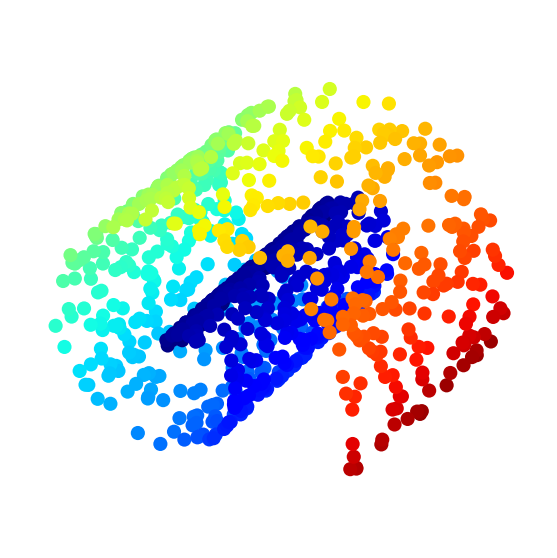

In [11]:
import numpy as np
# generate data
n = 1000
x = np.random.rand(2,n)

# swiss roll transformation
v = 3*np.pi/2*(.1 + 2*x[0,:])
X  = np.zeros([3,n])
X[1,:] = 20*x[1,:]
X[0,:] = - np.cos(v)*v
X[2,:] = np.sin(v)*v

from mpl_toolkits.mplot3d import Axes3D

# plot swiss roll
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[0,:], X[1,:], X[2,:], c=plt.cm.jet((X[0,:]**2+X[2,:]**2)/100), s=200, lw=0, alpha=1)
ax.set_xlim(np.min(X[0,:]),np.max(X[0,:]))
ax.set_ylim(np.min(X[1,:]),np.max(X[1,:]))
ax.set_zlim(np.min(X[2,:]),np.max(X[2,:]))
ax.axis("off");

In [12]:
# now with knn
# format X as (n_samples, n_features)
X = np.transpose(X)

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection="3d")

# plot original swiss roll
ax.scatter(X[:,0], X[:,1], X[:,2], c=plt.cm.jet((X[:,0]**2+X[:,2]**2)/100), s=200, lw=0, alpha=1);

# loop through each data point and plot lines connecting nearest neighbors
k = 6 # number of nearest neighbors
knn = nearest_neighbors(X, k)
for i in range(len(X)):
    neighbors = knn[i]
    for j in range(len(neighbors)):
        ax.plot(X[[i, neighbors.astype('int')[j]], 0], 
                X[[i, neighbors.astype('int')[j]], 1], 
                X[[i, neighbors.astype('int')[j]], 2], color='black');

# configure axis settings
ax.axis("off")
ax.set_xlim(np.min(X[:,0]),np.max(X[:,0]))
ax.set_ylim(np.min(X[:,1]),np.max(X[:,1]))
ax.set_zlim(np.min(X[:,2]),np.max(X[:,2]))
plt.show();

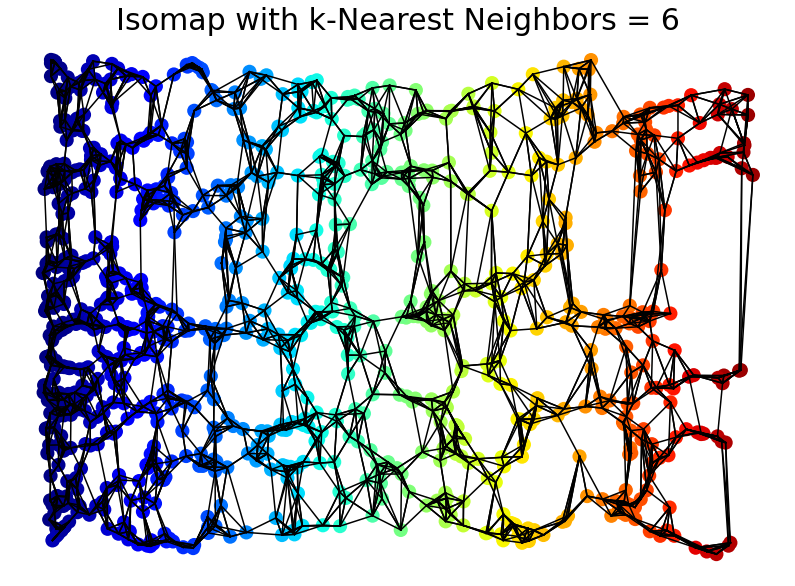

In [13]:
from sklearn.manifold import Isomap
data = X

# apply isomap with k = 6 and output dimension = 2
model = Isomap(n_components=2, n_neighbors=6)
proj = model.fit_transform(data)

# plot the isomap projection
plt.figure(figsize=(14,10))
plt.scatter(proj[:, 0], proj[:, 1], c=plt.cm.jet((X[:,0]**2+X[:,2]**2)/100), s=200, lw=0, alpha=1)

# plot lines connecting the same neighboring points from our original data
for i in range(len(X)):
    neighbors = knn[i]
    for j in range(len(neighbors)):
        plt.plot(proj[[i, neighbors.astype('int')[j]], 0], 
                 proj[[i, neighbors.astype('int')[j]], 1], color='black');
        
plt.title('Isomap with k-Nearest Neighbors = ' + str(k), size=30)
plt.axis("off")
plt.show();

In [14]:
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

# ignore warnings
import warnings
warnings.filterwarnings('ignore');


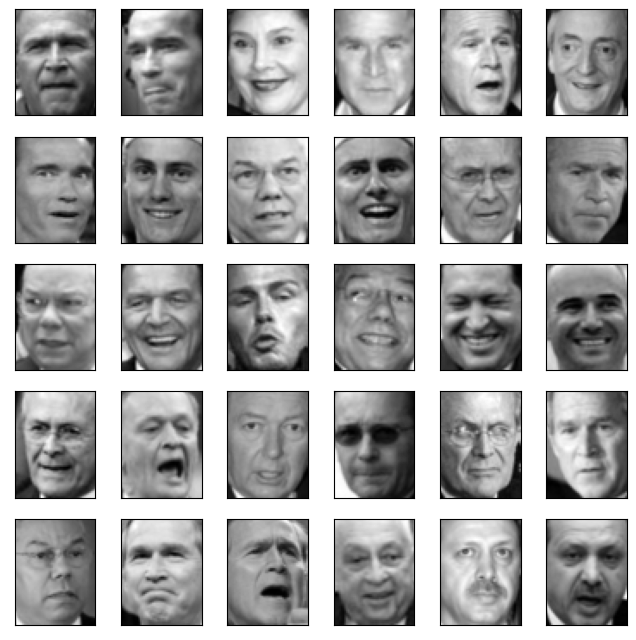

In [15]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape
faces.images.shape
faces.target_names
faces.target

# plot some images
fig, ax = plt.subplots(5, 6, subplot_kw=dict(xticks=[], yticks=[]), figsize=(8,8))
for i, axi in enumerate(ax.flat):
    _ = axi.imshow(faces.data[i].reshape(62, 47), cmap='gray');

In [16]:
# define a function to plot small images over the data points
from matplotlib import offsetbox

# source: https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

In [23]:
from sklearn.manifold import Isomap
np.random.seed(8888)
fig, ax = plt.subplots(figsize=(10, 10))
data = faces.data[faces.target==6]
images = faces.images[faces.target==6]
faces.target_names[6]
plot_components(data, model=Isomap(n_components=2, n_neighbors=8), images=images, thumb_frac=0.1)